# Exercise 7: Visualization
# Duy Tommy Tran

#### Importing library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib notebook
%matplotlib inline

In [2]:
# Setting the dpi of the figure to 180 dpi (for better quality)
mpl.rcParams['figure.dpi'] = 100

# Defining some figure parameters
mpl.rcParams.update({'figure.figsize': (10.0, 7),                   # Figuresize
                     'legend.fontsize': 17, 'legend.handlelength': 3, # Legend
                     'xtick.labelsize': 15, 'ytick.labelsize': 15,    # Tick-sizes of the axes
                     'font.size': 15})                                # Fontsize

#sns.set(rc={'figure.figsize':(11.0, 7.5)})

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [3]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P ./data/

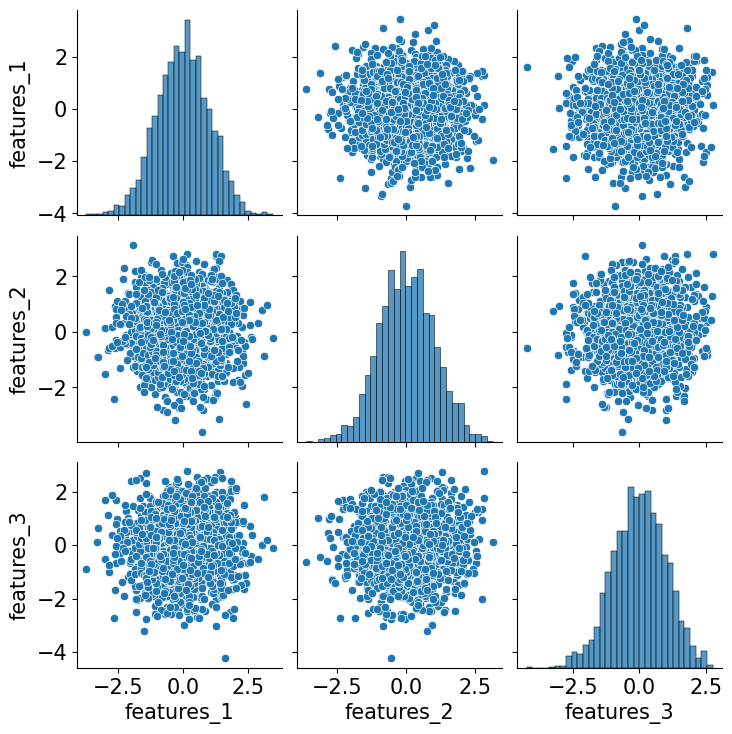

For two features to be correlated, we must be able to se a pattern.
An example of this is a straight line where the x-value grows at the same pace as the y-value.
This is not the case in our data so the features are NOT correlated.


In [4]:
file_name = "./data/regression_generated.csv"
data = pd.read_csv(file_name)
#data

f = ['features_1', 'features_2', 'features_3']
features = data.loc[:, f]
#features

sns.pairplot(features)
plt.show()

print('For two features to be correlated, we must be able to se a pattern.')
print('An example of this is a straight line where the x-value grows at the same pace as the y-value.') 
print('This is not the case in our data so the features are NOT correlated.')

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

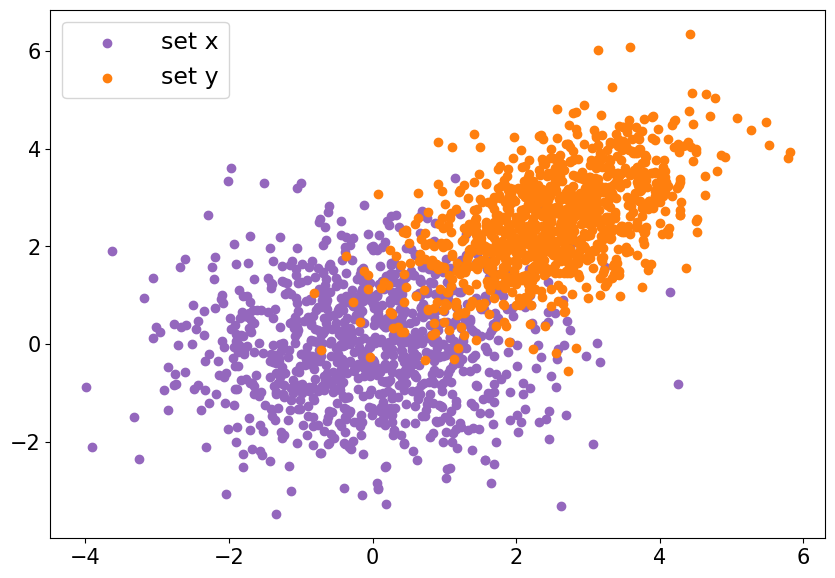

In [5]:
N = 1000

# Dataset x
mu = np.array([0, 0])                          #mean
sigma = np.array([[1.5, 0], [0, 1.5]])         #covariance
x = np.random.multivariate_normal(mu, sigma, N)

# Dataset y
mu = np.array([2.5, 2.5])                      #mean
sigma = np.array([[1, 0.5], [0.5, 1]])         #covariance
y = np.random.multivariate_normal(mu, sigma, N)

# Plot
plt.figure()
plt.scatter(x[:,0], x[:,1], c='tab:purple', label='set x')
plt.scatter(y[:,0], y[:,1], c='tab:orange', label='set y')
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [6]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

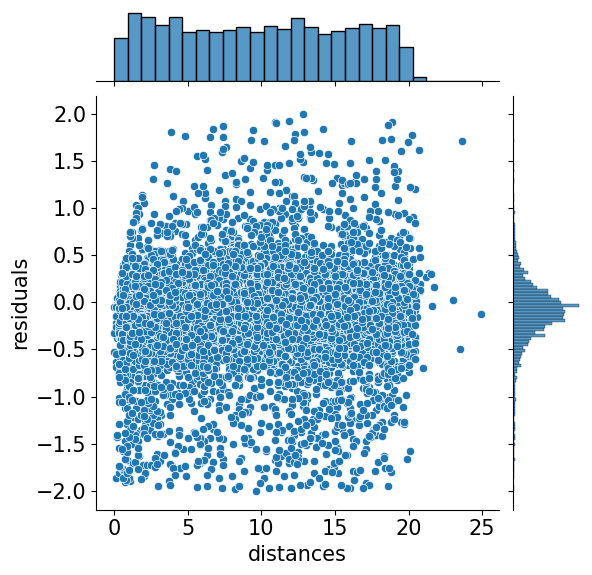

In [7]:
file_name = "./data/residuals_261.pkl"
data = pd.read_pickle(file_name)

df = pd.DataFrame(data.item())
df = df.loc[abs(df['residuals']) < 2]
#df

sns.jointplot(x='distances', y='residuals', data=df)
plt.show()

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [8]:
x_bins = np.linspace(0, 20, 9)
x = 0.5 * (x_bins[1:] + x_bins[:-1])

res = np.digitize(df['distances'], x)
y = [df['residuals'][res == i].mean() for i in range(1, len(x_bins))]

err_y = [df['residuals'][res == i].std() for i in range(1, len(x_bins))]

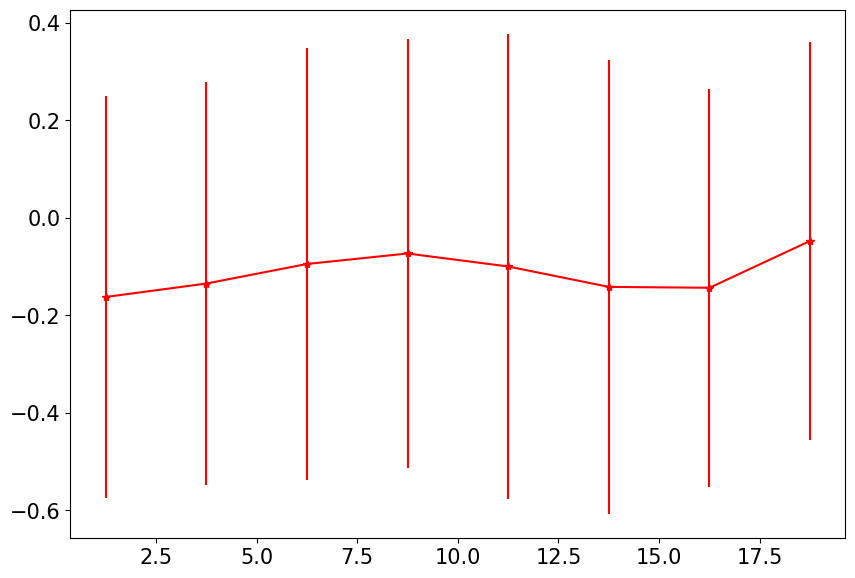

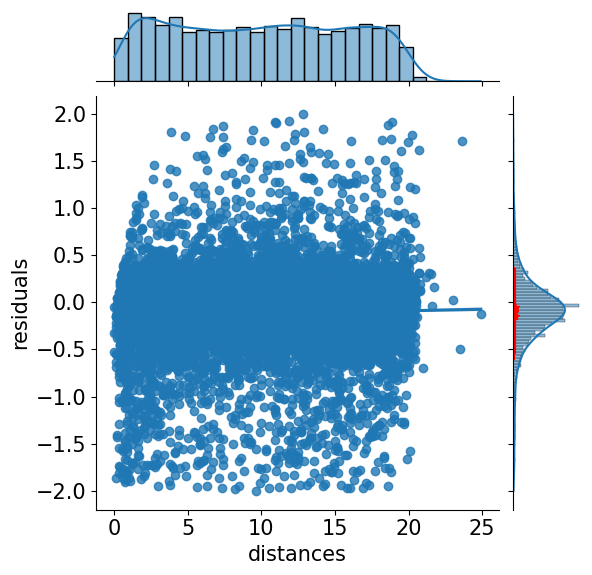

In [9]:
plt.errorbar(x, y, err_y, marker='*', color='r')
# Cannot display the profile plot over the scatter plot for some reason.
# So I'm just showing it here so it is visible

sns.jointplot(x='distances', y='residuals', data=df, kind='reg')
plt.errorbar(x, y, err_y, marker='*', color='r')
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.



In [10]:
N = 500
mu = 0.5     # mean
sigma = 1    # std
x = np.random.normal(mu, sigma, N)

# Creating histogram and bins for the distribution
hist, bin_edges = np.histogram(x, bins=50)

bins = 0.5 * (bin_edges[1:] + bin_edges[:-1])
std = np.sqrt(hist)


# Standard deviation default value
std_def = 1.06 * x.std() * N**(-1/5)


# Calculating the gaussion function
gauss = []
for i in x:
    gauss.append(scipy.stats.norm.rvs(i, std_def, N))  
trapez = scipy.integrate.trapz(gauss)/N

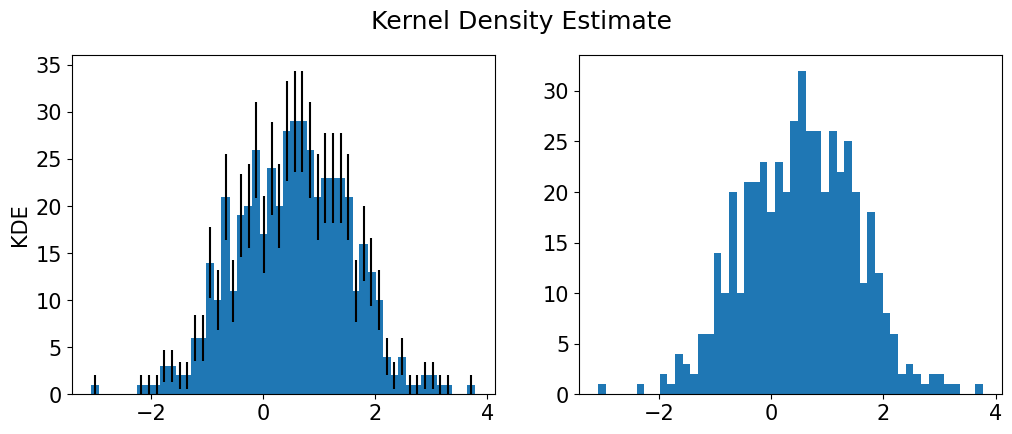

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4.5))

plt.suptitle('Kernel Density Estimate')
ax1.bar(bins, hist, width=0.15, yerr=std)  # Plot histogram with error bars
ax1.set_ylabel('KDE')

ax2 = plt.hist(trapez, 50)